### Imports

In [2]:
import os
import tables            as tb
import numpy             as np
import matplotlib.pyplot as plt

from antea  .io.mc_io_tb import read_mcsns_response
from astropy.coordinates import Angle

## Required time of the simulation
#### From the log file, the following information has been taken

In [3]:
## NEXUS initial file
time_starting_sim1  = Angle('14h33m25s')
time_finishing_sim1 = Angle('15h7m55s')
sim_time1 = time_finishing_sim1 - time_starting_sim1
print('NEXUS initial file:')
print('Total time required simulation 1: ', round(sim_time1.hour * 60, 2), ' min')
print('')

## NEXUS only save charge above threshold (2 pes)
time_starting_sim2  = Angle('14h33m26s')
time_finishing_sim2 = Angle('15h13m6s')
sim_time2 = time_finishing_sim2 - time_starting_sim2
print('NEXUS only save charge above threshold (2 pes):')
print('Total time required simulation 2: ', round(sim_time2.hour * 60, 2), ' min')

NEXUS initial file:
Total time required simulation 1:  104.15  min

NEXUS only save charge above threshold (2 pes):
Total time required simulation 2:  103.67  min


## Size of the different files

In [5]:
file1 = 'full_ring_iradius165mm_z140mm_depth3cm_pitch7mm_test1.100.pet.h5'
file2 = 'full_ring_iradius165mm_z140mm_depth3cm_pitch7mm_test2.100.pet.h5'

total_size1 = os.path.getsize(file1)
total_size2 = os.path.getsize(file2)
print('NEXUS initial file:')
print(f"{round(total_size1/1e6, 2)} Mb (15000 events simulated)")
print('')
print('NEXUS only save charge above threshold (2 pes):')
print(f"{round(total_size2/1e6, 2)} Mb (15000 events simulated)")

NEXUS initial file:
201.88 Mb (15000 events simulated)

NEXUS only save charge above threshold (2 pes):
149.19 Mb (15000 events simulated)


### Check that the initial file extracting charges below threshold is equal to the new file

In [6]:
h5in           = tb.open_file(file1, mode='r')
h5extents      = h5in.root.MC.extents
events_in_file = len(h5extents)
diff_thrs      = []

for evt in range(events_in_file):
    this_event_wvf1 = read_mcsns_response(file1, (evt,evt+1))
    this_event_wvf2 = read_mcsns_response(file2, (evt,evt+1))
    
    sns_dict1    = list(this_event_wvf1.values())[0]
    tot_charges1 = np.array(list(map(lambda x: sum(x.charges), sns_dict1.values())))
    sns_ids1     = np.array(list(sns_dict1.keys()))
    indices_over_thr1 = (tot_charges1 > 2)
    sns_over_thr1     = sns_ids1    [indices_over_thr1]
    charges_over_thr1 = tot_charges1[indices_over_thr1]
    
    sns_dict2    = list(this_event_wvf2.values())[0]
    tot_charges2 = np.array(list(map(lambda x: sum(x.charges), sns_dict2.values())))
    sns_ids2     = np.array(list(sns_dict2.keys()))
    
    diff_thrs.append(charges_over_thr1 - tot_charges2)
    assert np.all(charges_over_thr1) == np.all(tot_charges2)

### Plot the results:

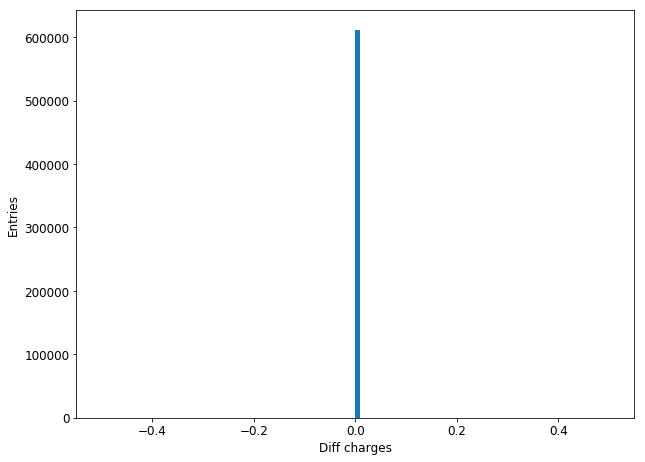

In [26]:
plt.rcParams["font.size"] = 12
fig = plt.figure(1)
fig.set_figwidth(10.)
fig.set_figheight(7.5)
plt.hist(np.hstack(np.array(diff_thrs)), 100)
plt.xlabel('Diff charges')
plt.ylabel('Entries')
plt.show()